# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [5]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

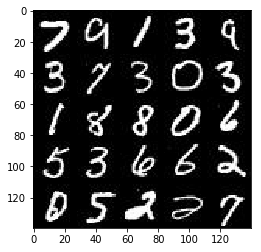

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

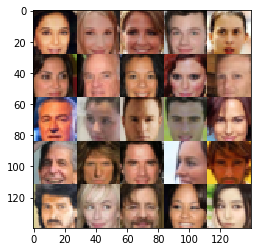

In [7]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [9]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, [None,image_width,image_height,image_channels], name='input_real') 
    inputs_z = tf.placeholder(tf.float32, [None,z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, [], name='Learning_Rate') 
    

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [10]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        print('disc input layer =',images.get_shape() )
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        print('x1 =',x1.get_shape() )
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        print('disc x2',relu2.get_shape())
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        print('disc x3=',relu3.get_shape())

       # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        print('disc flat=',flat.get_shape())
        # flat 4096

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

disc input layer = (?, 28, 28, 3)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
disc input layer = (?, 28, 28, 3)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [11]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
  
    reuse = True
    if is_train == True:
        reuse = False
        
    alpha = .2
    
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        print('z',z.get_shape())
        x1 = tf.layers.dense(z, 7*7*512,activation=None)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        print('x1',x1.get_shape())
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now
        print('x2',x2.get_shape())
        
        #x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128 now
        #print('x3',x3.get_shape())
        
        
        # Output layer
        
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        print('gen logits=',logits.get_shape(),'out_channel_dim=',out_channel_dim)
        out = tf.tanh(logits)
        print(out.get_shape())
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 5) out_channel_dim= 5
(?, 28, 28, 5)
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 5) out_channel_dim= 5
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [12]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * (1 - 0.1)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_real)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
    
   
    #return d_loss_real, d_loss_fake


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 4) out_channel_dim= 4
(?, 28, 28, 4)
disc input layer = (?, 28, 28, 4)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
disc input layer = (?, 28, 28, 4)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [13]:

def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print('dateshape', data_shape)
 
    steps = 0
    inputs_real, inputs_z, i_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    samples, losses = [], []
    
    
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps = steps + 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                input_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: input_z,i_rate:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: input_z, inputs_real: batch_images,i_rate:learning_rate})

                if steps % 100 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: input_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: input_z})

                    print("Epoch =", epoch_i,
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    print("epoch, steps",epoch_i,steps)
                    
                    if steps % 10 == 0:
                        print("Epoch {}/{}...".format(epoch_i, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
    
    return 
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

dateshape (60000, 28, 28, 1)
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)
disc input layer = (?, 28, 28, 1)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
disc input layer = (?, 28, 28, 1)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
Epoch = 0 Discriminator Loss: 1.1417... Generator Loss: 0.9769
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


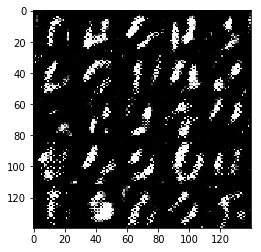

epoch, steps 0 100
Epoch 0/2... Discriminator Loss: 1.1417... Generator Loss: 0.9769
Epoch = 0 Discriminator Loss: 1.6785... Generator Loss: 0.5009
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


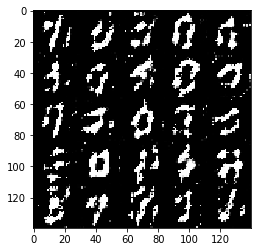

epoch, steps 0 200
Epoch 0/2... Discriminator Loss: 1.6785... Generator Loss: 0.5009
Epoch = 0 Discriminator Loss: 0.4051... Generator Loss: 3.7299
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


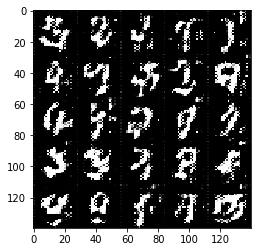

epoch, steps 0 300
Epoch 0/2... Discriminator Loss: 0.4051... Generator Loss: 3.7299
Epoch = 0 Discriminator Loss: 1.3218... Generator Loss: 1.3352
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


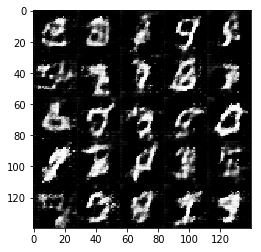

epoch, steps 0 400
Epoch 0/2... Discriminator Loss: 1.3218... Generator Loss: 1.3352
Epoch = 0 Discriminator Loss: 1.1480... Generator Loss: 1.2372
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


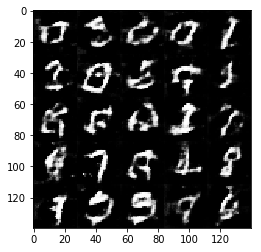

epoch, steps 0 500
Epoch 0/2... Discriminator Loss: 1.1480... Generator Loss: 1.2372
Epoch = 0 Discriminator Loss: 1.2346... Generator Loss: 1.1618
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


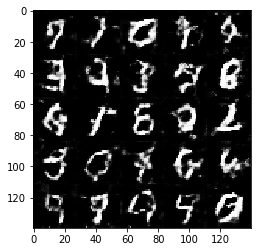

epoch, steps 0 600
Epoch 0/2... Discriminator Loss: 1.2346... Generator Loss: 1.1618
Epoch = 0 Discriminator Loss: 1.0349... Generator Loss: 0.8604
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


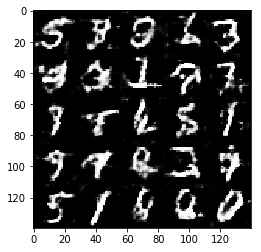

epoch, steps 0 700
Epoch 0/2... Discriminator Loss: 1.0349... Generator Loss: 0.8604
Epoch = 0 Discriminator Loss: 1.7854... Generator Loss: 2.2470
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


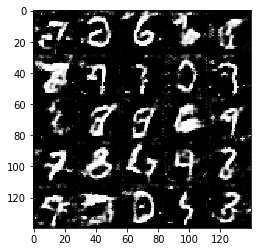

epoch, steps 0 800
Epoch 0/2... Discriminator Loss: 1.7854... Generator Loss: 2.2470
Epoch = 0 Discriminator Loss: 1.3046... Generator Loss: 0.6070
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


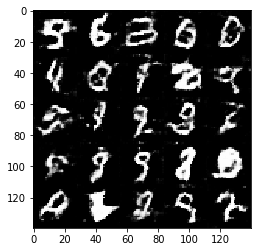

epoch, steps 0 900
Epoch 0/2... Discriminator Loss: 1.3046... Generator Loss: 0.6070
Epoch = 0 Discriminator Loss: 0.7489... Generator Loss: 1.3955
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


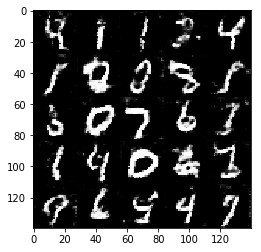

epoch, steps 0 1000
Epoch 0/2... Discriminator Loss: 0.7489... Generator Loss: 1.3955
Epoch = 0 Discriminator Loss: 2.3809... Generator Loss: 0.1948
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


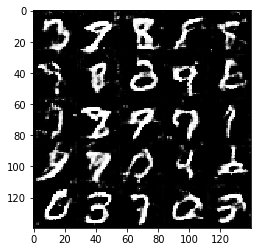

epoch, steps 0 1100
Epoch 0/2... Discriminator Loss: 2.3809... Generator Loss: 0.1948
Epoch = 0 Discriminator Loss: 0.9477... Generator Loss: 1.5286
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


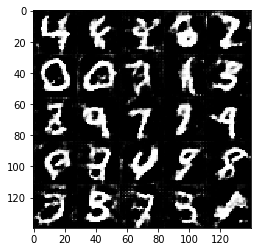

epoch, steps 0 1200
Epoch 0/2... Discriminator Loss: 0.9477... Generator Loss: 1.5286
Epoch = 1 Discriminator Loss: 1.9095... Generator Loss: 0.2967
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


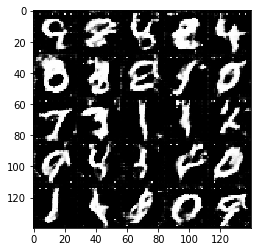

epoch, steps 1 1300
Epoch 1/2... Discriminator Loss: 1.9095... Generator Loss: 0.2967
Epoch = 1 Discriminator Loss: 0.8204... Generator Loss: 1.4095
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 1) out_channel_dim= 1
(?, 28, 28, 1)


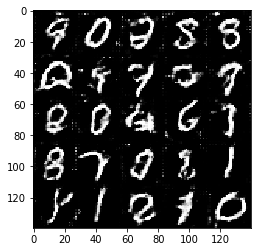

epoch, steps 1 1400
Epoch 1/2... Discriminator Loss: 0.8204... Generator Loss: 1.4095


In [ ]:
batch_size = 50
z_dim = 100
learning_rate = .01
beta1 = .05


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

dateshape (202599, 28, 28, 3)
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)
disc input layer = (?, 28, 28, 3)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
disc input layer = (?, 28, 28, 3)
x1 = (?, 14, 14, 64)
disc x2 (?, 7, 7, 128)
disc x3= (?, 4, 4, 256)
disc flat= (?, 4096)
Epoch = 0 Discriminator Loss: 1.2204... Generator Loss: 1.8118
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


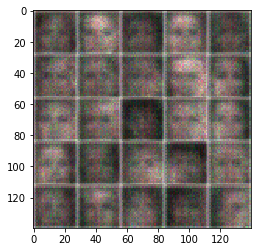

epoch, steps 0 100
Epoch 0/1... Discriminator Loss: 1.2204... Generator Loss: 1.8118
Epoch = 0 Discriminator Loss: 1.1120... Generator Loss: 1.3567
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


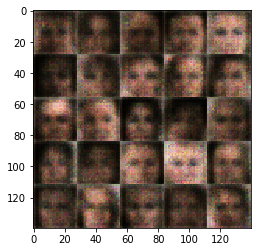

epoch, steps 0 200
Epoch 0/1... Discriminator Loss: 1.1120... Generator Loss: 1.3567
Epoch = 0 Discriminator Loss: 0.8492... Generator Loss: 1.7837
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


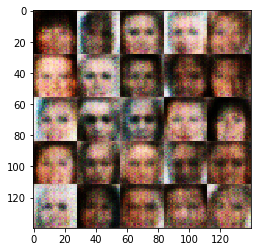

epoch, steps 0 300
Epoch 0/1... Discriminator Loss: 0.8492... Generator Loss: 1.7837
Epoch = 0 Discriminator Loss: 1.6926... Generator Loss: 2.4365
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


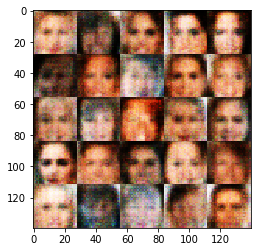

epoch, steps 0 400
Epoch 0/1... Discriminator Loss: 1.6926... Generator Loss: 2.4365
Epoch = 0 Discriminator Loss: 0.7791... Generator Loss: 1.4239
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


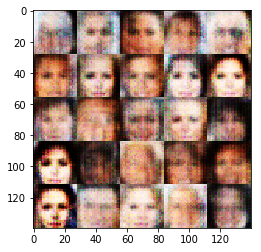

epoch, steps 0 500
Epoch 0/1... Discriminator Loss: 0.7791... Generator Loss: 1.4239
Epoch = 0 Discriminator Loss: 0.6531... Generator Loss: 2.2178
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


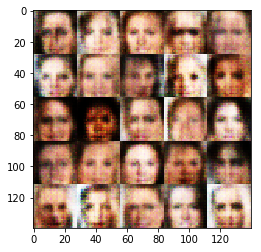

epoch, steps 0 600
Epoch 0/1... Discriminator Loss: 0.6531... Generator Loss: 2.2178
Epoch = 0 Discriminator Loss: 0.7521... Generator Loss: 3.2216
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


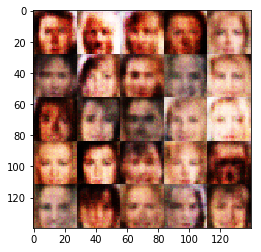

Epoch = 0 Discriminator Loss: 0.5939... Generator Loss: 3.4582
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


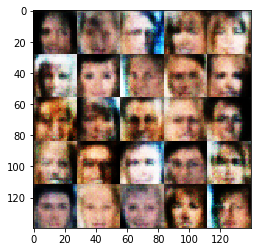

epoch, steps 0 800
Epoch 0/1... Discriminator Loss: 0.5939... Generator Loss: 3.4582
Epoch = 0 Discriminator Loss: 1.6650... Generator Loss: 0.3331
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


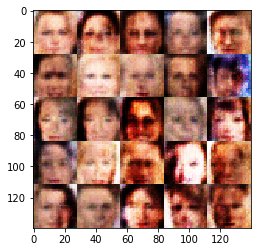

epoch, steps 0 900
Epoch 0/1... Discriminator Loss: 1.6650... Generator Loss: 0.3331
Epoch = 0 Discriminator Loss: 0.8390... Generator Loss: 0.9993
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


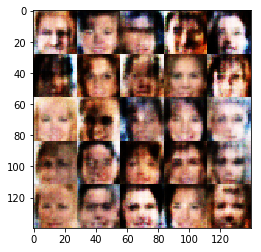

epoch, steps 0 1000
Epoch 0/1... Discriminator Loss: 0.8390... Generator Loss: 0.9993
Epoch = 0 Discriminator Loss: 0.3477... Generator Loss: 5.3073
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


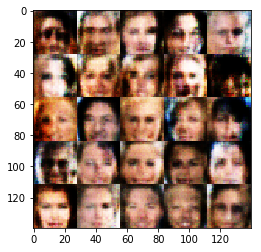

epoch, steps 0 1100
Epoch 0/1... Discriminator Loss: 0.3477... Generator Loss: 5.3073
Epoch = 0 Discriminator Loss: 0.4286... Generator Loss: 2.7233
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


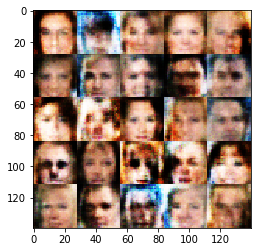

epoch, steps 0 1200
Epoch 0/1... Discriminator Loss: 0.4286... Generator Loss: 2.7233
Epoch = 0 Discriminator Loss: 0.3414... Generator Loss: 7.5313
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


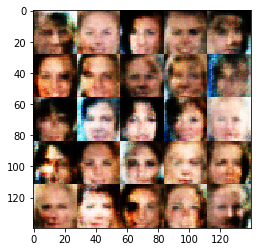

epoch, steps 0 1300
Epoch 0/1... Discriminator Loss: 0.3414... Generator Loss: 7.5313
Epoch = 0 Discriminator Loss: 0.3396... Generator Loss: 7.3890
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


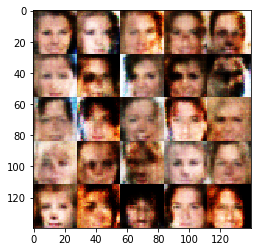

epoch, steps 0 1400
Epoch 0/1... Discriminator Loss: 0.3396... Generator Loss: 7.3890
Epoch = 0 Discriminator Loss: 0.3952... Generator Loss: 2.9924
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


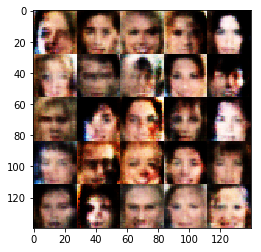

epoch, steps 0 1500
Epoch 0/1... Discriminator Loss: 0.3952... Generator Loss: 2.9924
Epoch = 0 Discriminator Loss: 1.4180... Generator Loss: 0.4811
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


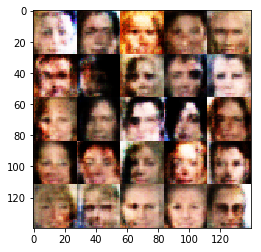

epoch, steps 0 1600
Epoch 0/1... Discriminator Loss: 1.4180... Generator Loss: 0.4811
Epoch = 0 Discriminator Loss: 0.4622... Generator Loss: 2.2590
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


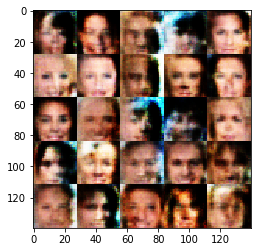

epoch, steps 0 1700
Epoch 0/1... Discriminator Loss: 0.4622... Generator Loss: 2.2590
Epoch = 0 Discriminator Loss: 0.8243... Generator Loss: 8.5101
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


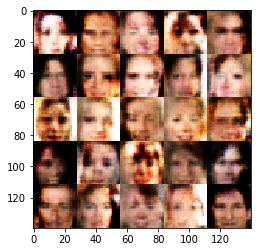

epoch, steps 0 1800
Epoch 0/1... Discriminator Loss: 0.8243... Generator Loss: 8.5101
Epoch = 0 Discriminator Loss: 0.3357... Generator Loss: 6.8905
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


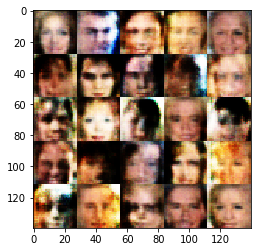

epoch, steps 0 1900
Epoch 0/1... Discriminator Loss: 0.3357... Generator Loss: 6.8905
Epoch = 0 Discriminator Loss: 0.9879... Generator Loss: 0.7923
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


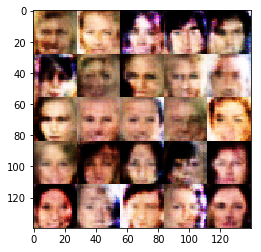

epoch, steps 0 2000
Epoch 0/1... Discriminator Loss: 0.9879... Generator Loss: 0.7923
Epoch = 0 Discriminator Loss: 0.3640... Generator Loss: 3.7608
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


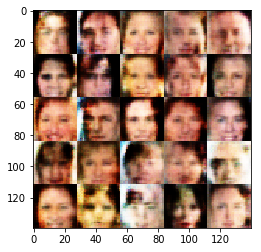

epoch, steps 0 2100
Epoch 0/1... Discriminator Loss: 0.3640... Generator Loss: 3.7608
Epoch = 0 Discriminator Loss: 0.3803... Generator Loss: 3.2422
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


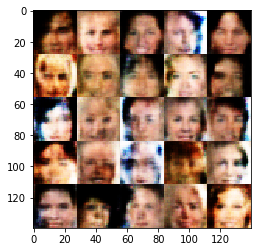

epoch, steps 0 2200
Epoch 0/1... Discriminator Loss: 0.3803... Generator Loss: 3.2422
Epoch = 0 Discriminator Loss: 0.3472... Generator Loss: 4.4420
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


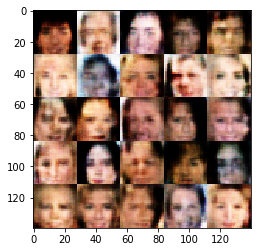

epoch, steps 0 2300
Epoch 0/1... Discriminator Loss: 0.3472... Generator Loss: 4.4420
Epoch = 0 Discriminator Loss: 0.3329... Generator Loss: 7.8961
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


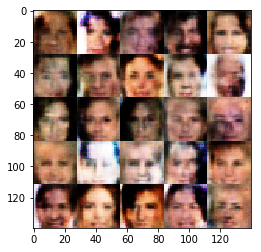

epoch, steps 0 2400
Epoch 0/1... Discriminator Loss: 0.3329... Generator Loss: 7.8961
Epoch = 0 Discriminator Loss: 0.3885... Generator Loss: 3.0513
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


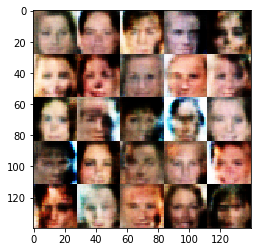

epoch, steps 0 2500
Epoch 0/1... Discriminator Loss: 0.3885... Generator Loss: 3.0513
Epoch = 0 Discriminator Loss: 0.3403... Generator Loss: 6.6182
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


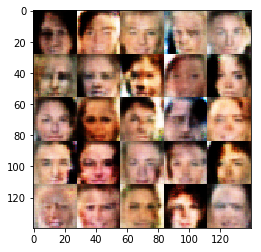

epoch, steps 0 2600
Epoch 0/1... Discriminator Loss: 0.3403... Generator Loss: 6.6182
Epoch = 0 Discriminator Loss: 0.6513... Generator Loss: 1.4095
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


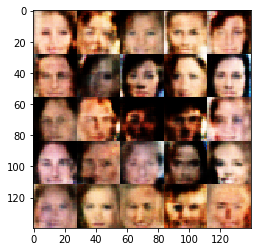

epoch, steps 0 2700
Epoch 0/1... Discriminator Loss: 0.6513... Generator Loss: 1.4095
Epoch = 0 Discriminator Loss: 0.3380... Generator Loss: 5.6501
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


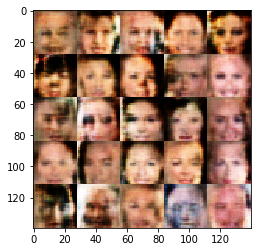

epoch, steps 0 2800
Epoch 0/1... Discriminator Loss: 0.3380... Generator Loss: 5.6501
Epoch = 0 Discriminator Loss: 0.5301... Generator Loss: 2.0068
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


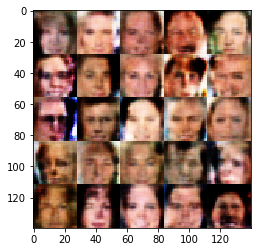

epoch, steps 0 2900
Epoch 0/1... Discriminator Loss: 0.5301... Generator Loss: 2.0068
Epoch = 0 Discriminator Loss: 0.3659... Generator Loss: 3.6946
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


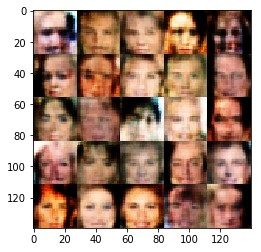

epoch, steps 0 3000
Epoch 0/1... Discriminator Loss: 0.3659... Generator Loss: 3.6946
Epoch = 0 Discriminator Loss: 0.3401... Generator Loss: 4.9877
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


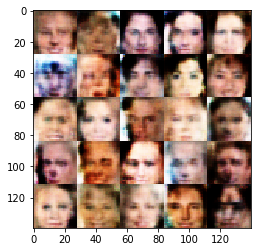

epoch, steps 0 3100
Epoch 0/1... Discriminator Loss: 0.3401... Generator Loss: 4.9877
Epoch = 0 Discriminator Loss: 0.5486... Generator Loss: 1.7604
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


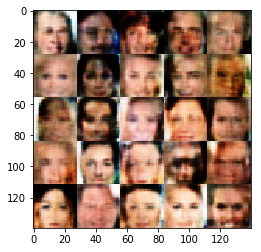

epoch, steps 0 3200
Epoch 0/1... Discriminator Loss: 0.5486... Generator Loss: 1.7604
Epoch = 0 Discriminator Loss: 0.4000... Generator Loss: 3.0688
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


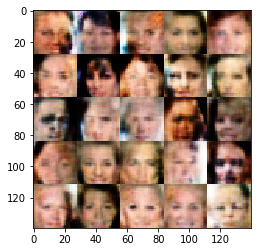

epoch, steps 0 3300
Epoch 0/1... Discriminator Loss: 0.4000... Generator Loss: 3.0688
Epoch = 0 Discriminator Loss: 1.0957... Generator Loss: 0.6986
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


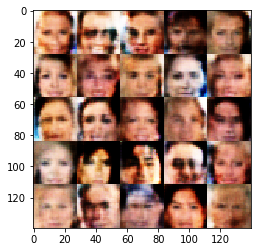

epoch, steps 0 3400
Epoch 0/1... Discriminator Loss: 1.0957... Generator Loss: 0.6986
Epoch = 0 Discriminator Loss: 1.0168... Generator Loss: 0.7602
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


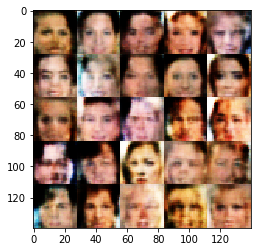

epoch, steps 0 3500
Epoch 0/1... Discriminator Loss: 1.0168... Generator Loss: 0.7602
Epoch = 0 Discriminator Loss: 0.3341... Generator Loss: 9.0106
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


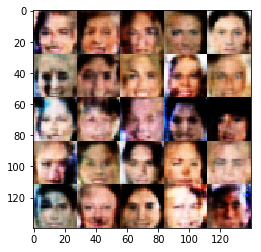

epoch, steps 0 3600
Epoch 0/1... Discriminator Loss: 0.3341... Generator Loss: 9.0106
Epoch = 0 Discriminator Loss: 0.3671... Generator Loss: 7.8888
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


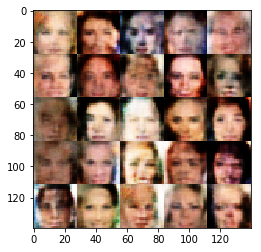

epoch, steps 0 3700
Epoch 0/1... Discriminator Loss: 0.3671... Generator Loss: 7.8888
Epoch = 0 Discriminator Loss: 0.3480... Generator Loss: 4.6675
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


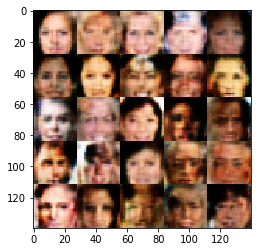

epoch, steps 0 3800
Epoch 0/1... Discriminator Loss: 0.3480... Generator Loss: 4.6675
Epoch = 0 Discriminator Loss: 0.3361... Generator Loss: 6.5283
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


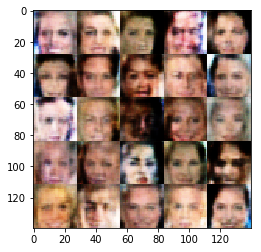

epoch, steps 0 3900
Epoch 0/1... Discriminator Loss: 0.3361... Generator Loss: 6.5283
Epoch = 0 Discriminator Loss: 0.3460... Generator Loss: 7.6980
z (?, 100)
x1 (?, 7, 7, 512)
x2 (?, 14, 14, 256)
gen logits= (?, 28, 28, 3) out_channel_dim= 3
(?, 28, 28, 3)


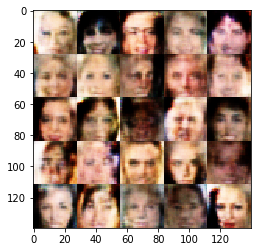

epoch, steps 0 4000
Epoch 0/1... Discriminator Loss: 0.3460... Generator Loss: 7.6980


In [ ]:
batch_size = 50
z_dim = 100
learning_rate = .0001
beta1 = .05


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.

In [ ]:
a = 5